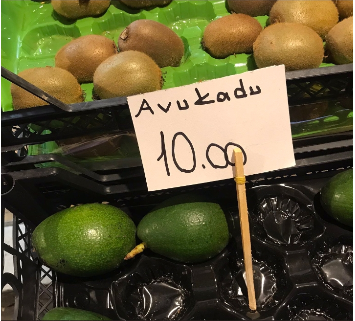

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Understanding the Decision Tree Algorithm
#Decision tree learning is one of the predictive modeling approaches used in statistics, data mining and machine learning. It uses a decision tree (prediction model) to navigate from observations about an item (branches) to conclusions about the item's target value (leaves). Tree models in which the target variable can take a separate set of values are called classification trees; In these tree structures, leaves represent class tags and branches represent combinations of traits that lead to these class tags. Decision trees (typically real numbers) in which the target variable can take continuous values are called regression trees.

# Some relevant columns in the dataset:


1. AveragePrice - the average price of a single avocado
2. type - conventional or organic new values (0,1)
3. year - the year
4. Region - the city or region of the observation
5. Total Volume - Total number of avocados sold
6. 4046 - Total number of avocados with PLU 4046 sold
7. 4225 - Total number of avocados with PLU 4225 sold
8. 4770 - Total number of avocados with PLU 4770 sold

In [ ]:
data = pd.read_csv("/kaggle/input/avocado-prices/avocado.csv")

In [ ]:
data.head()

# We start by taking only 9 columns of our data set.

In [ ]:
data=data.iloc[:,2:12]
data.head()

In [ ]:
data["type"]

# We return the type values corresponding to their values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
data["type"]=LabelEncoder.fit_transform(data["type"])
data

# We separate our data set as 30% testing and 70% learning.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X=data.iloc[:,0:9]
y=data.iloc[:,9:10]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42,stratify=y)

# Like a little kid, our algorithm learns based on test rates, but never memorizes because the values are transmitted randomly. You can test

In [ ]:
decisionTreeRegressor=DecisionTreeRegressor() 
decisionTreeRegressor.fit(X_train,y_train)

In [ ]:
y_pred=decisionTreeRegressor.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

# And our results algorithm works close to 100% accuracy.


In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

# If you want to test the accuracy you can [check](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) here

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

# Let's find the column that most impresses our dataset

* It should be clear from the above results that our Total Bags column is the value that most affects our data set.
> P> | z | With values of 0.1934


# Feature Selection
Feature selection is the process of reducing the number of input variables when developing a predictive model.
Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.
Irrelevant or partially relevant features can negatively impact model performance.
Feature selection and Data cleaning should be the first and most important step of your model designing.
> However, in this article, we will not only look at the data reduction process, but only what those data are.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.naive_bayes import GaussianNB
# Build Naive Bayes classifier to use in feature selection
clf = GaussianNB()
# Build step forward feature selection
sfs1 = sfs(clf,
           k_features="best",
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=10,
           n_jobs=-1)

In [ ]:
sfs1.fit(X, y)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

# Thank you for viewing my work, good work :)